<!-- dom:TITLE: Week 42 Convolutional and Recurrent Neural Networks and Autoencoders -->
# Week 42 Convolutional and Recurrent Neural Networks and Autoencoders
<!-- dom:AUTHOR: Morten Hjorth-Jensen at Department of Physics, University of Oslo & Department of Physics and Astronomy and National Superconducting Cyclotron Laboratory, Michigan State University -->
<!-- Author: -->  
**Morten Hjorth-Jensen**, Department of Physics, University of Oslo and Department of Physics and Astronomy and National Superconducting Cyclotron Laboratory, Michigan State University

Date: **Oct 15, 2020**

Copyright 1999-2020, Morten Hjorth-Jensen. Released under CC Attribution-NonCommercial 4.0 license




## Plan for week 42

* Thursday: Convolutional Neural Networks and examples

* Friday: Recurrent Neural Networks and Autoencoders

Reading suggestions for both days: [Aurelien Geron's chapters 13 and 14](https://github.com/CompPhysics/MachineLearning/blob/master/doc/Textbooks/TensorflowML.pdf). Autoencoders are discussed in chapter 15 of Geron's text.





## Convolutional Neural Networks (recognizing images)


Convolutional neural networks (CNNs) were developed during the last
decade of the previous century, with a focus on character recognition
tasks. Nowadays, CNNs are a central element in the spectacular success
of deep learning methods. The success in for example image
classifications have made them a central tool for most machine
learning practitioners.

CNNs are very similar to ordinary Neural Networks.
They are made up of neurons that have learnable weights and
biases. Each neuron receives some inputs, performs a dot product and
optionally follows it with a non-linearity. The whole network still
expresses a single differentiable score function: from the raw image
pixels on one end to class scores at the other. And they still have a
loss function (for example Softmax) on the last (fully-connected) layer
and all the tips/tricks we developed for learning regular Neural
Networks still apply (back propagation, gradient descent etc etc).

What is the difference? **CNN architectures make the explicit assumption that
the inputs are images, which allows us to encode certain properties
into the architecture. These then make the forward function more
efficient to implement and vastly reduce the amount of parameters in
the network.**

Here we provide only a superficial overview, for the more interested, we recommend highly the course
[IN5400 – Machine Learning for Image Analysis](https://www.uio.no/studier/emner/matnat/ifi/IN5400/index-eng.html)
and the slides of [CS231](http://cs231n.github.io/convolutional-networks/).

Another good read is the article here <https://arxiv.org/pdf/1603.07285.pdf>. 




## Neural Networks vs CNNs

Neural networks are defined as **affine transformations**, that is 
a vector is received as input and is multiplied with a matrix of so-called weights (our unknown paramters) to produce an
output (to which a bias vector is usually added before passing the result
through a nonlinear activation function). This is applicable to any type of input, be it an
image, a sound clip or an unordered collection of features: whatever their
dimensionality, their representation can always be flattened into a vector
before the transformation.


## Why CNNS for images, sound files, medical images from CT scans etc?

However, when we consider images, sound clips and many other similar kinds of data, these data  have an intrinsic
structure. More formally, they share these important properties:
* They are stored as multi-dimensional arrays (think of the pixels of a figure) .

* They feature one or more axes for which ordering matters (e.g., width and height axes for an image, time axis for a sound clip).

* One axis, called the channel axis, is used to access different views of the data (e.g., the red, green and blue channels of a color image, or the left and right channels of a stereo audio track).

These properties are not exploited when an affine transformation is applied; in
fact, all the axes are treated in the same way and the topological information
is not taken into account. Still, taking advantage of the implicit structure of
the data may prove very handy in solving some tasks, like computer vision and
speech recognition, and in these cases it would be best to preserve it. This is
where discrete convolutions come into play.

A discrete convolution is a linear transformation that preserves this notion of
ordering. It is sparse (only a few input units contribute to a given output
unit) and reuses parameters (the same weights are applied to multiple locations
in the input).




## Regular NNs don’t scale well to full images

As an example, consider
an image of size $32\times 32\times 3$ (32 wide, 32 high, 3 color channels), so a
single fully-connected neuron in a first hidden layer of a regular
Neural Network would have $32\times 32\times 3 = 3072$ weights. This amount still
seems manageable, but clearly this fully-connected structure does not
scale to larger images. For example, an image of more respectable
size, say $200\times 200\times 3$, would lead to neurons that have 
$200\times 200\times 3 = 120,000$ weights. 

We could have
several such neurons, and the parameters would add up quickly! Clearly,
this full connectivity is wasteful and the huge number of parameters
would quickly lead to possible overfitting.

<!-- dom:FIGURE: [figslides/nn.jpeg, width=500 frac=0.6]  A regular 3-layer Neural Network. -->
<!-- begin figure -->

<p>A regular 3-layer Neural Network.</p>
<img src="figslides/nn.jpeg" width=500>

<!-- end figure -->


## 3D volumes of neurons

Convolutional Neural Networks take advantage of the fact that the
input consists of images and they constrain the architecture in a more
sensible way. 

In particular, unlike a regular Neural Network, the
layers of a CNN have neurons arranged in 3 dimensions: width,
height, depth. (Note that the word depth here refers to the third
dimension of an activation volume, not to the depth of a full Neural
Network, which can refer to the total number of layers in a network.)

To understand it better, the above example of an image 
with an input volume of
activations has dimensions $32\times 32\times 3$ (width, height,
depth respectively). 

The neurons in a layer will
only be connected to a small region of the layer before it, instead of
all of the neurons in a fully-connected manner. Moreover, the final
output layer could  for this specific image have dimensions $1\times 1 \times 10$, 
because by the
end of the CNN architecture we will reduce the full image into a
single vector of class scores, arranged along the depth
dimension. 

<!-- dom:FIGURE: [figslides/cnn.jpeg, width=500 frac=0.6]  A CNN arranges its neurons in three dimensions (width, height, depth), as visualized in one of the layers. Every layer of a CNN transforms the 3D input volume to a 3D output volume of neuron activations. In this example, the red input layer holds the image, so its width and height would be the dimensions of the image, and the depth would be 3 (Red, Green, Blue channels). -->
<!-- begin figure -->

<p>A CNN arranges its neurons in three dimensions (width, height, depth), as visualized in one of the layers. Every layer of a CNN transforms the 3D input volume to a 3D output volume of neuron activations. In this example, the red input layer holds the image, so its width and height would be the dimensions of the image, and the depth would be 3 (Red, Green, Blue channels).</p>
<img src="figslides/cnn.jpeg" width=500>

<!-- end figure -->




<!-- !split  -->
## Layers used to build CNNs


A simple CNN is a sequence of layers, and every layer of a CNN
transforms one volume of activations to another through a
differentiable function. We use three main types of layers to build
CNN architectures: Convolutional Layer, Pooling Layer, and
Fully-Connected Layer (exactly as seen in regular Neural Networks). We
will stack these layers to form a full CNN architecture.

A simple CNN for image classification could have the architecture:

* **INPUT** ($32\times 32 \times 3$) will hold the raw pixel values of the image, in this case an image of width 32, height 32, and with three color channels R,G,B.

* **CONV** (convolutional )layer will compute the output of neurons that are connected to local regions in the input, each computing a dot product between their weights and a small region they are connected to in the input volume. This may result in volume such as $[32\times 32\times 12]$ if we decided to use 12 filters.

* **RELU** layer will apply an elementwise activation function, such as the $max(0,x)$ thresholding at zero. This leaves the size of the volume unchanged ($[32\times 32\times 12]$).

* **POOL** (pooling) layer will perform a downsampling operation along the spatial dimensions (width, height), resulting in volume such as $[16\times 16\times 12]$.

* **FC** (i.e. fully-connected) layer will compute the class scores, resulting in volume of size $[1\times 1\times 10]$, where each of the 10 numbers correspond to a class score, such as among the 10 categories of the MNIST images we considered above . As with ordinary Neural Networks and as the name implies, each neuron in this layer will be connected to all the numbers in the previous volume.

## Transforming images

CNNs transform the original image layer by layer from the original
pixel values to the final class scores. 

Observe that some layers contain
parameters and other don’t. In particular, the CNN layers perform
transformations that are a function of not only the activations in the
input volume, but also of the parameters (the weights and biases of
the neurons). On the other hand, the RELU/POOL layers will implement a
fixed function. The parameters in the CONV/FC layers will be trained
with gradient descent so that the class scores that the CNN computes
are consistent with the labels in the training set for each image.


## CNNs in brief

In summary:

* A CNN architecture is in the simplest case a list of Layers that transform the image volume into an output volume (e.g. holding the class scores)

* There are a few distinct types of Layers (e.g. CONV/FC/RELU/POOL are by far the most popular)

* Each Layer accepts an input 3D volume and transforms it to an output 3D volume through a differentiable function

* Each Layer may or may not have parameters (e.g. CONV/FC do, RELU/POOL don’t)

* Each Layer may or may not have additional hyperparameters (e.g. CONV/FC/POOL do, RELU doesn’t)

For more material on convolutional networks, we strongly recommend
the course
[IN5400 – Machine Learning for Image Analysis](https://www.uio.no/studier/emner/matnat/ifi/IN5400/index-eng.html)
and the slides of [CS231](http://cs231n.github.io/convolutional-networks/) which is taught at Stanford University (consistently ranked as one of the top computer science programs in the world). [Michael Nielsen's book is a must read, in particular chapter 6 which deals with CNNs](http://neuralnetworksanddeeplearning.com/chap6.html).



## CNNs in more detail, building convolutional neural networks in Tensorflow and Keras


As discussed above, CNNs are neural networks built from the assumption that the inputs
to the network are 2D images. This is important because the number of features or pixels in images
grows very fast with the image size, and an enormous number of weights and biases are needed in order to build an accurate network.  

As before, we still have our input, a hidden layer and an output. What's novel about convolutional networks
are the **convolutional** and **pooling** layers stacked in pairs between the input and the hidden layer.
In addition, the data is no longer represented as a 2D feature matrix, instead each input is a number of 2D
matrices, typically 1 for each color dimension (Red, Green, Blue). 


## Setting it up

It means that to represent the entire
dataset of images, we require a 4D matrix or **tensor**. This tensor has the dimensions:

$$
(n_{inputs},\, n_{pixels, width},\, n_{pixels, height},\, depth) .
$$

## The MNIST dataset again

The MNIST dataset consists of grayscale images with a pixel size of
$28\times 28$, meaning we require $28 \times 28 = 724$ weights to each
neuron in the first hidden layer.

If we were to analyze images of size $128\times 128$ we would require
$128 \times 128 = 16384$ weights to each neuron. Even worse if we were
dealing with color images, as most images are, we have an image matrix
of size $128\times 128$ for each color dimension (Red, Green, Blue),
meaning 3 times the number of weights $= 49152$ are required for every
single neuron in the first hidden layer.


## Strong correlations

Images typically have strong local correlations, meaning that a small
part of the image varies little from its neighboring regions. If for
example we have an image of a blue car, we can roughly assume that a
small blue part of the image is surrounded by other blue regions.

Therefore, instead of connecting every single pixel to a neuron in the
first hidden layer, as we have previously done with deep neural
networks, we can instead connect each neuron to a small part of the
image (in all 3 RGB depth dimensions).  The size of each small area is
fixed, and known as a [receptive](https://en.wikipedia.org/wiki/Receptive_field).


<!-- !split  -->
## Layers of a CNN
The layers of a convolutional neural network arrange neurons in 3D: width, height and depth.  
The input image is typically a square matrix of depth 3. 

A **convolution** is performed on the image which outputs
a 3D volume of neurons. The weights to the input are arranged in a number of 2D matrices, known as **filters**.


Each filter slides along the input image, taking the dot product
between each small part of the image and the filter, in all depth
dimensions. This is then passed through a non-linear function,
typically the **Rectified Linear (ReLu)** function, which serves as the
activation of the neurons in the first convolutional layer. This is
further passed through a **pooling layer**, which reduces the size of the
convolutional layer, e.g. by taking the maximum or average across some
small regions, and this serves as input to the next convolutional
layer.


## Systematic reduction

By systematically reducing the size of the input volume, through
convolution and pooling, the network should create representations of
small parts of the input, and then from them assemble representations
of larger areas.  The final pooling layer is flattened to serve as
input to a hidden layer, such that each neuron in the final pooling
layer is connected to every single neuron in the hidden layer. This
then serves as input to the output layer, e.g. a softmax output for
classification.


## Prerequisites: Collect and pre-process data

inputs = (n_inputs, pixel_width, pixel_height, depth) = (1797, 8, 8, 1)
labels = (n_inputs) = (1797,)


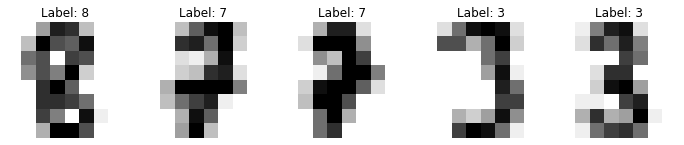

In [1]:
%matplotlib inline

# import necessary packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets


# ensure the same random numbers appear every time
np.random.seed(0)

# display images in notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,12)


# download MNIST dataset
digits = datasets.load_digits()

# define inputs and labels
inputs = digits.images
labels = digits.target

# RGB images have a depth of 3
# our images are grayscale so they should have a depth of 1
inputs = inputs[:,:,:,np.newaxis]

print("inputs = (n_inputs, pixel_width, pixel_height, depth) = " + str(inputs.shape))
print("labels = (n_inputs) = " + str(labels.shape))


# choose some random images to display
n_inputs = len(inputs)
indices = np.arange(n_inputs)
random_indices = np.random.choice(indices, size=5)

for i, image in enumerate(digits.images[random_indices]):
    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title("Label: %d" % digits.target[random_indices[i]])
plt.show()

## Importing Keras and Tensorflow

In [2]:
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Sequential      #This allows appending layers to existing models
from tensorflow.keras.layers import Dense           #This allows defining the characteristics of a particular layer
from tensorflow.keras import optimizers             #This allows using whichever optimiser we want (sgd,adam,RMSprop)
from tensorflow.keras import regularizers           #This allows using whichever regularizer we want (l1,l2,l1_l2)
from tensorflow.keras.utils import to_categorical   #This allows using categorical cross entropy as the cost function
#rt Cofrom tensorflow.keras imponv2D
#from tensorflow.keras import MaxPooling2D
#from tensorflow.keras import Flatten

from sklearn.model_selection import train_test_split

# representation of labels
labels = to_categorical(labels)

# split into train and test data
# one-liner from scikit-learn library
train_size = 0.8
test_size = 1 - train_size
X_train, X_test, Y_train, Y_test = train_test_split(inputs, labels, train_size=train_size,
                                                    test_size=test_size)

<!-- !split  -->
## Running with Keras

In [3]:
def create_convolutional_neural_network_keras(input_shape, receptive_field,
                                              n_filters, n_neurons_connected, n_categories,
                                              eta, lmbd):
    model = Sequential()
    model.add(layers.Conv2D(n_filters, (receptive_field, receptive_field), input_shape=input_shape, padding='same',
              activation='relu', kernel_regularizer=regularizers.l2(lmbd)))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(n_neurons_connected, activation='relu', kernel_regularizer=regularizers.l2(lmbd)))
    model.add(layers.Dense(n_categories, activation='softmax', kernel_regularizer=regularizers.l2(lmbd)))
    
    sgd = optimizers.SGD(lr=eta)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    return model

epochs = 100
batch_size = 100
input_shape = X_train.shape[1:4]
receptive_field = 3
n_filters = 10
n_neurons_connected = 50
n_categories = 10

eta_vals = np.logspace(-5, 1, 7)
lmbd_vals = np.logspace(-5, 1, 7)

## Final part

In [4]:
CNN_keras = np.zeros((len(eta_vals), len(lmbd_vals)), dtype=object)
        
for i, eta in enumerate(eta_vals):
    for j, lmbd in enumerate(lmbd_vals):
        CNN = create_convolutional_neural_network_keras(input_shape, receptive_field,
                                              n_filters, n_neurons_connected, n_categories,
                                              eta, lmbd)
        CNN.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, verbose=0)
        scores = CNN.evaluate(X_test, Y_test)
        
        CNN_keras[i][j] = CNN
        
        print("Learning rate = ", eta)
        print("Lambda = ", lmbd)
        print("Test accuracy: %.3f" % scores[1])
        print()

360/360 [==============================] - 0s 361us/sample - loss: 3.4180 - accuracy: 0.1778
Learning rate =  1e-05
Lambda =  1e-05
Test accuracy: 0.178

360/360 [==============================] - 0s 320us/sample - loss: 3.4203 - accuracy: 0.0917
Learning rate =  1e-05
Lambda =  0.0001
Test accuracy: 0.092

360/360 [==============================] - 0s 316us/sample - loss: 2.7661 - accuracy: 0.1556
Learning rate =  1e-05
Lambda =  0.001
Test accuracy: 0.156

360/360 [==============================] - 0s 314us/sample - loss: 3.5947 - accuracy: 0.1167
Learning rate =  1e-05
Lambda =  0.01
Test accuracy: 0.117

360/360 [==============================] - 0s 323us/sample - loss: 12.5511 - accuracy: 0.1111
Learning rate =  1e-05
Lambda =  0.1
Test accuracy: 0.111

360/360 [==============================] - 0s 293us/sample - loss: 91.5551 - accuracy: 0.2222
Learning rate =  1e-05
Lambda =  1.0
Test accuracy: 0.222

360/360 [==============================] - 0s 312us/sample - loss: 518.1064 - 

## Final visualization

1437/1437 [==============================] - 0s 67us/sample - loss: 285465.2778 - accuracy: 0.0995


360/360 [==============================] - 0s 231us/sample - loss: nan - accuracy: 0.0778


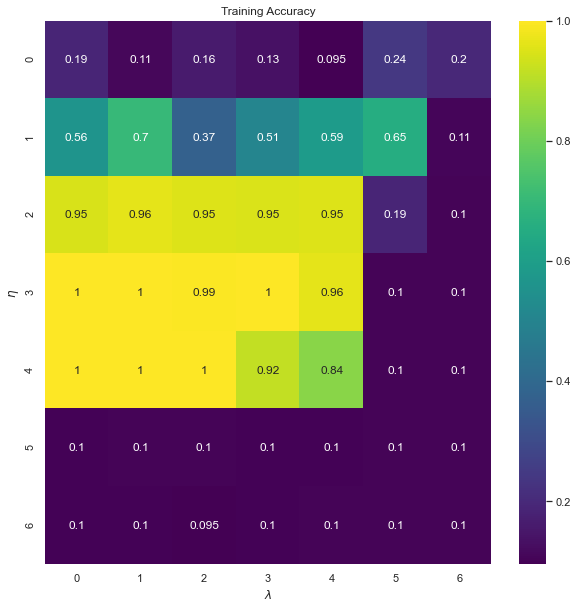

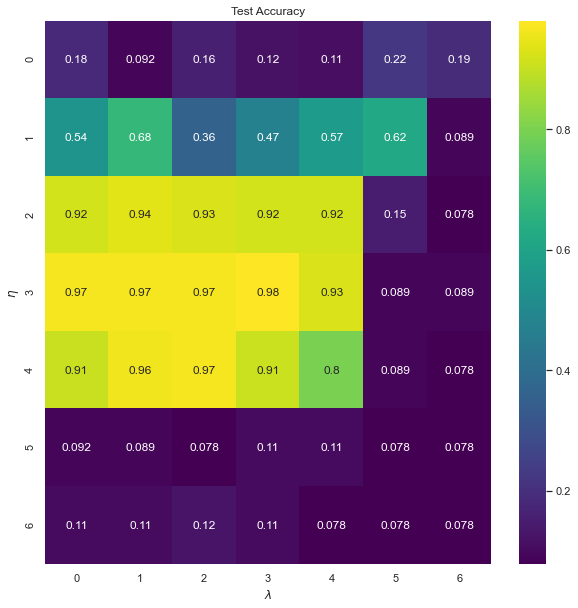

In [6]:
# visual representation of grid search
# uses seaborn heatmap, could probably do this in matplotlib
import seaborn as sns

sns.set()

train_accuracy = np.zeros((len(eta_vals), len(lmbd_vals)))
test_accuracy = np.zeros((len(eta_vals), len(lmbd_vals)))

for i in range(len(eta_vals)):
    for j in range(len(lmbd_vals)):
        CNN = CNN_keras[i][j]

        train_accuracy[i][j] = CNN.evaluate(X_train, Y_train)[1]
        test_accuracy[i][j] = CNN.evaluate(X_test, Y_test)[1]

        
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(train_accuracy, annot=True, ax=ax, cmap="viridis")
ax.set_title("Training Accuracy")
ax.set_ylabel("$\eta$")
ax.set_xlabel("$\lambda$")
plt.show()

fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(test_accuracy, annot=True, ax=ax, cmap="viridis")
ax.set_title("Test Accuracy")
ax.set_ylabel("$\eta$")
ax.set_xlabel("$\lambda$")
plt.show()

## The CIFAR01 data set

The CIFAR10 dataset contains 60,000 color images in 10 classes, with
6,000 images in each class. The dataset is divided into 50,000
training images and 10,000 testing images. The classes are mutually
exclusive and there is no overlap between them.

In [7]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# We import the data set
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1 by dividing by 255. 
train_images, test_images = train_images / 255.0, test_images / 255.0

170500096/170498071 [==============================] - 35s 0us/step


## Verifying the data set

To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image.

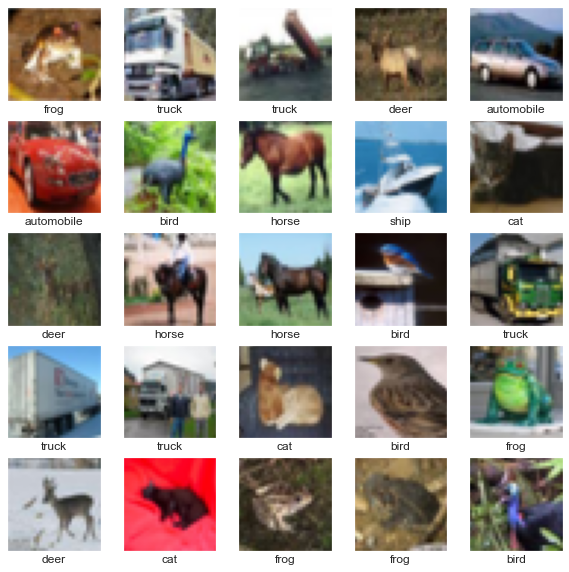

In [9]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## Set up  the model

The 6 lines of code below define the convolutional base using a common pattern: a stack of Conv2D and MaxPooling2D layers.

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. If you are new to these dimensions, color_channels refers to (R,G,B). In this example, you will configure our CNN to process inputs of shape (32, 32, 3), which is the format of CIFAR images. You can do this by passing the argument input_shape to our first layer.

In [10]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Let's display the architecture of our model so far.

model.summary()

Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


You can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). The width and height dimensions tend to shrink as you go deeper in the network. The number of output channels for each Conv2D layer is controlled by the first argument (e.g., 32 or 64). Typically, as the width and height shrink, you can afford (computationally) to add more output channels in each Conv2D layer.




## Add Dense layers on top

To complete our model, you will feed the last output tensor from the
convolutional base (of shape (4, 4, 64)) into one or more Dense layers
to perform classification. Dense layers take vectors as input (which
are 1D), while the current output is a 3D tensor. First, you will
flatten (or unroll) the 3D output to 1D, then add one or more Dense
layers on top. CIFAR has 10 output classes, so you use a final Dense
layer with 10 outputs and a softmax activation.

In [12]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
#Here's the complete architecture of our model.

model.summary()

Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_49 (Flatten)         (None, 1024)              0         
_________________________________________________________________
dense_98 (Dense)             (None, 64)              

As you can see, our (4, 4, 64) outputs were flattened into vectors of shape (1024) before going through two Dense layers.

## Compile and train the model

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 40s 793us/sample - loss: 1.5115 - accuracy: 0.4515 - val_loss: 1.2411 - val_accuracy: 0.5545
Epoch 2/10
50000/50000 [==============================] - 41s 826us/sample - loss: 1.1297 - accuracy: 0.6006 - val_loss: 1.0419 - val_accuracy: 0.6307
Epoch 3/10
50000/50000 [==============================] - 43s 870us/sample - loss: 0.9842 - accuracy: 0.6534 - val_loss: 1.0402 - val_accuracy: 0.6314
Epoch 4/10
50000/50000 [==============================] - 43s 869us/sample - loss: 0.8824 - accuracy: 0.6894 - val_loss: 0.9944 - val_accuracy: 0.6599
Epoch 5/10
50000/50000 [==============================] - 40s 803us/sample - loss: 0.8098 - accuracy: 0.7171 - val_loss: 0.9176 - val_accuracy: 0.6829
Epoch 6/10
50000/50000 [==============================] - 46s 925us/sample - loss: 0.7469 - accuracy: 0.7370 - val_loss: 0.8683 - val_accuracy: 0.7072
Epoch 7/10
50000/50000 [====================

## Finally, evaluate the model

In [11]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print(test_acc)

## Recurrent neural networks: Overarching view

Till now our focus has been, including convolutional neural networks
as well, on feedforward neural networks. The output or the activations
flow only in one direction, from the input layer to the output layer.

A recurrent neural network (RNN) looks very much like a feedforward
neural network, except that it also has connections pointing
backward. 

RNNs are used to analyze time series data such as stock prices, and
tell you when to buy or sell. In autonomous driving systems, they can
anticipate car trajectories and help avoid accidents. More generally,
they can work on sequences of arbitrary lengths, rather than on
fixed-sized inputs like all the nets we have discussed so far. For
example, they can take sentences, documents, or audio samples as
input, making them extremely useful for natural language processing
systems such as automatic translation and speech-to-text.


## A simple example

In [12]:
# Start importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model, Sequential 
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU
from tensorflow.keras import optimizers     
from tensorflow.keras import regularizers           
from tensorflow.keras.utils import to_categorical 



# convert into dataset matrix
def convertToMatrix(data, step):
 X, Y =[], []
 for i in range(len(data)-step):
  d=i+step  
  X.append(data[i:d,])
  Y.append(data[d,])
 return np.array(X), np.array(Y)

step = 4
N = 1000    
Tp = 800    

t=np.arange(0,N)
x=np.sin(0.02*t)+2*np.random.rand(N)
df = pd.DataFrame(x)
df.head()

plt.plot(df)
plt.show()

values=df.values
train,test = values[0:Tp,:], values[Tp:N,:]

# add step elements into train and test
test = np.append(test,np.repeat(test[-1,],step))
train = np.append(train,np.repeat(train[-1,],step))
 
trainX,trainY =convertToMatrix(train,step)
testX,testY =convertToMatrix(test,step)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(1,step), activation="relu"))
model.add(Dense(8, activation="relu")) 
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='rmsprop')
model.summary()

model.fit(trainX,trainY, epochs=100, batch_size=16, verbose=2)
trainPredict = model.predict(trainX)
testPredict= model.predict(testX)
predicted=np.concatenate((trainPredict,testPredict),axis=0)

trainScore = model.evaluate(trainX, trainY, verbose=0)
print(trainScore)

index = df.index.values
plt.plot(index,df)
plt.plot(index,predicted)
plt.axvline(df.index[Tp], c="r")
plt.show()

## Set up of an RNN

The figure here displays a simple example of an RNN, with inputs $x_t$
at a given time $t$ and outputs $y_t$.  Introducing time as a variable
offers an intutitive way of understanding these networks. In addition
to the inputs $x_t$, the layer at a time $t$ receives also as input
the output from the previous layer $t-1$, that is $y_{t1}$.

This means also that we need to have weights that link both the inputs
$x_t$ to the outputs $y_t$ as well as weights that link the output
from the previous time $y_{t-1}$ and $y_t$.  The figure here shows an
example of a simple RNN.

More material will be added here.


## Solving differential equations and eigenvalue problems with RNNs



In our discussions of ordinary differential equations and partial
differential equations using neural networks. Here we will discuss how
we can solve say ordinary differential equations and eigenvalue
problems using RNNs. Eigenvalue problems can be solved using RNNs by
rewriting such a problems as a non-linear differential equation.

Instead of starting with a well-known ordinary differential equation,
we start directly with an eigenvaule problem.



## Long-Short Time Memory

Discussions about dynamic unrolling through time. discuss memory cells, input and output




## Autoencoders: Overarching view

Autoencoders are artificial neural networks capable of learning
efficient representations of the input data (these representations are called codings)  without
any supervision (i.e., the training set is unlabeled). These codings
typically have a much lower dimensionality than the input data, making
autoencoders useful for dimensionality reduction. 

More importantly, autoencoders act as powerful feature detectors, and
they can be used for unsupervised pretraining of deep neural networks.

Lastly, they are capable of randomly generating new data that looks
very similar to the training data; this is called a generative
model. For example, you could train an autoencoder on pictures of
faces, and it would then be able to generate new faces.  Surprisingly,
autoencoders work by simply learning to copy their inputs to their
outputs. This may sound like a trivial task, but we will see that
constraining the network in various ways can make it rather
difficult. For example, you can limit the size of the internal
representation, or you can add noise to the inputs and train the
network to recover the original inputs. These constraints prevent the
autoencoder from trivially copying the inputs directly to the outputs,
which forces it to learn efficient ways of representing the data. In
short, the codings are byproducts of the autoencoder’s attempt to
learn the identity function under some constraints.

## Simple examples of Autoencoders